# Question 1

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as si

In [2]:
data = yf.download('SBUX', start='2015-01-01', end='2019-12-31') #download data

[*********************100%%**********************]  1 of 1 completed


In [3]:
data['Daily_Return'] = data['Adj Close'].pct_change()

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return
Date,,,,,,,
2015-01-02,41.064999,41.490002,40.445000,40.720001,34.400909,6886000,NaN
2015-01-05,40.070000,40.334999,39.744999,39.939999,33.741940,11623800,-0.019156
2015-01-06,40.169998,40.195000,39.279999,39.615002,33.467377,7664400,-0.008137
2015-01-07,39.875000,40.615002,39.700001,40.590000,34.291073,9732600,0.024612
2015-01-08,41.165001,41.650002,41.009998,41.244999,34.844429,13170600,0.016137


In [5]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return
Date,,,,,,,
2019-12-23,88.620003,88.849998,88.180000,88.230003,81.360100,4349700,-0.002600
2019-12-24,88.199997,88.599998,88.000000,88.519997,81.627510,1847800,0.003287
2019-12-26,88.730003,88.760002,87.790001,88.080002,81.221756,4177700,-0.004971
2019-12-27,88.110001,88.459999,87.690002,88.129997,81.267876,4129300,0.000568
2019-12-30,88.010002,88.199997,87.059998,87.440002,80.631584,4655600,-0.007830


In [6]:
annualized_return = data['Daily_Return'].mean() * 252

In [7]:
annualized_volatility = data['Daily_Return'].std() * np.sqrt(252)

In [8]:
print(f'Annualized Return: {annualized_return * 100:.2f}%')
print(f'Annualized Volatility: {annualized_volatility * 100:.2f}%') 

Annualized Return: 19.22%
Annualized Volatility: 20.62%


In [10]:
data['log_return'] =np.log(data['Adj Close']/ data['Adj Close'].shift(1)) 

In [11]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,log_return
Date,,,,,,,,
2015-01-02,41.064999,41.490002,40.445000,40.720001,34.400909,6886000,NaN,NaN
2015-01-05,40.070000,40.334999,39.744999,39.939999,33.741940,11623800,-0.019156,-0.019341
2015-01-06,40.169998,40.195000,39.279999,39.615002,33.467377,7664400,-0.008137,-0.008170
2015-01-07,39.875000,40.615002,39.700001,40.590000,34.291073,9732600,0.024612,0.024314
2015-01-08,41.165001,41.650002,41.009998,41.244999,34.844429,13170600,0.016137,0.016008


In [12]:
vol = np.sqrt(252) * data['log_return'].std() 

In [13]:
vol

0.20643283685108266

In [14]:
print('the annualized volatility is', round (vol*100,2), '%')

the annualized volatility is 20.64 %


In [15]:
pip install yesg

Note: you may need to restart the kernel to use updated packages.


In [16]:
import yesg

In [58]:
ESG = yesg.get_historic_esg('SBUX')
ESG

,Total-Score,E-Score,S-Score,G-Score
Date,,,,
2014-09-01,71.00,71.00,71.0,72.00
2014-10-01,71.00,71.00,71.0,72.00
2014-11-01,71.00,71.00,71.0,72.00
2014-12-01,71.00,71.00,71.0,72.00
2015-01-01,71.00,71.00,71.0,72.00
...,...,...,...,...
2022-04-01,NaN,NaN,NaN,NaN
2022-05-01,24.83,6.11,14.5,4.21
2022-06-01,NaN,NaN,NaN,NaN


In [86]:
ESG.info

<bound method DataFrame.info of             Total-Score  E-Score  S-Score  G-Score
Date                                              
2014-09-01        71.00    71.00     71.0    72.00
2014-10-01        71.00    71.00     71.0    72.00
2014-11-01        71.00    71.00     71.0    72.00
2014-12-01        71.00    71.00     71.0    72.00
2015-01-01        71.00    71.00     71.0    72.00
...                 ...      ...      ...      ...
2022-04-01          NaN      NaN      NaN      NaN
2022-05-01        24.83     6.11     14.5     4.21
2022-06-01          NaN      NaN      NaN      NaN
2022-07-01          NaN      NaN      NaN      NaN
2022-08-01        24.83     6.11     14.5     4.21

[96 rows x 4 columns]>

In [87]:
ESG = pd.DataFrame.dropna(ESG)
ESG

,Total-Score,E-Score,S-Score,G-Score
Date,,,,
2014-09-01,71.00,71.00,71.00,72.00
2014-10-01,71.00,71.00,71.00,72.00
2014-11-01,71.00,71.00,71.00,72.00
2014-12-01,71.00,71.00,71.00,72.00
2015-01-01,71.00,71.00,71.00,72.00
...,...,...,...,...
2021-05-01,21.40,3.21,13.57,4.63
2021-09-01,21.20,3.39,13.49,4.32
2022-02-01,24.67,6.11,14.24,4.31


In [85]:
ESG.iloc[4:64]

,Total-Score,E-Score,S-Score,G-Score
Date,,,,
2015-01-01,71.00,71.00,71.00,72.00
2015-02-01,71.00,71.00,71.00,72.00
2015-03-01,72.00,72.00,71.00,72.00
2015-04-01,72.00,72.00,71.00,72.00
2015-05-01,72.00,72.00,71.00,72.00
2015-06-01,72.00,72.00,71.00,72.00
2015-07-01,72.00,72.00,71.00,72.00
2015-08-01,70.00,70.00,72.00,67.00
2015-09-01,70.00,70.00,72.00,67.00


Text(0.5, 1.0, 'ESG for Starbucks Inc.')

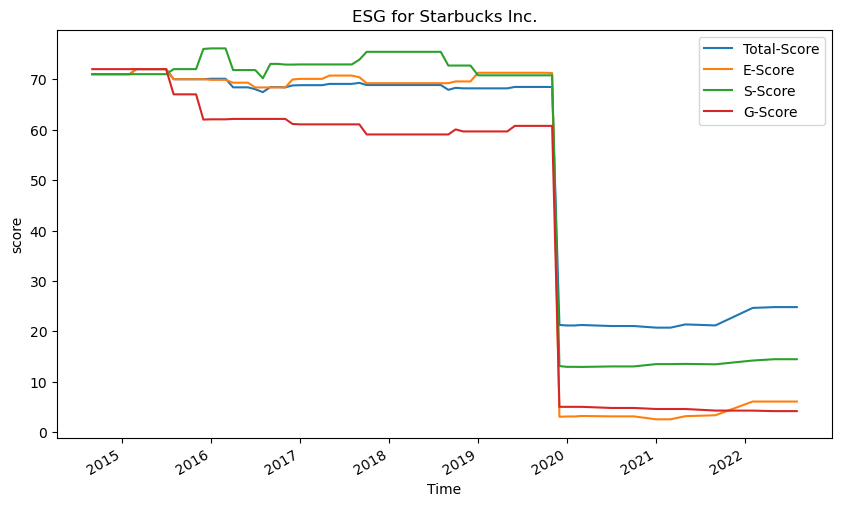

In [89]:
ESG.plot(figsize=(10, 6)) 
plt.xlabel('Time')
plt.ylabel('score')
plt.title('ESG for Starbucks Inc.')

[*********************100%%**********************]  1 of 1 completed


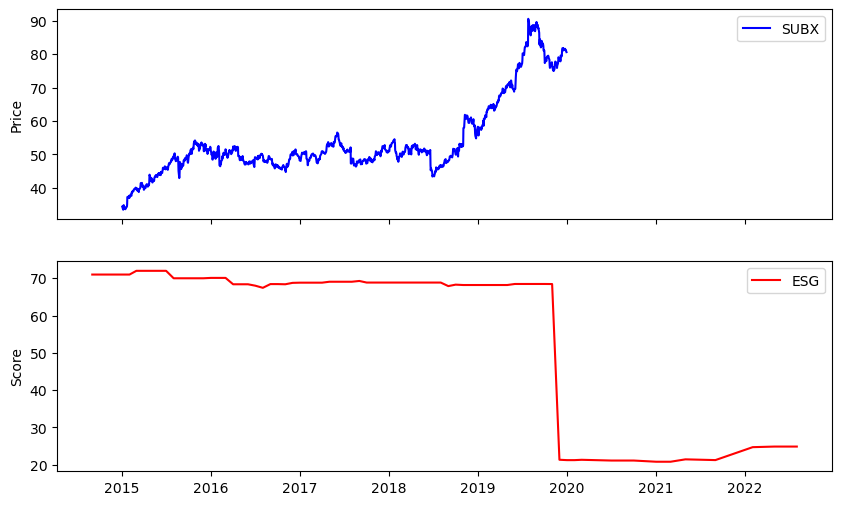

In [114]:
data = yf.download('SBUX', start='2015-01-01', end='2019-12-31') 

# Subplots
fig, axs = plt.subplots(2, sharex=True, figsize=(10, 6))

axs[0].plot(data['Adj Close'], label='SUBX', color='blue')
axs[0].set_ylabel('Price')
axs[0].legend()

axs[1].plot(ESG['Total-Score'],label='ESG', color='red')
axs[1].set_ylabel('Score')
axs[1].legend()

# Question 2

In [34]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

In [40]:
start = datetime(2022, 8, 1)
end = datetime(2022, 8, 31)

In [41]:
location = Point(32.061707, 118.763232, 17)

In [42]:
data = Daily(location, start, end)
data = data.fetch()

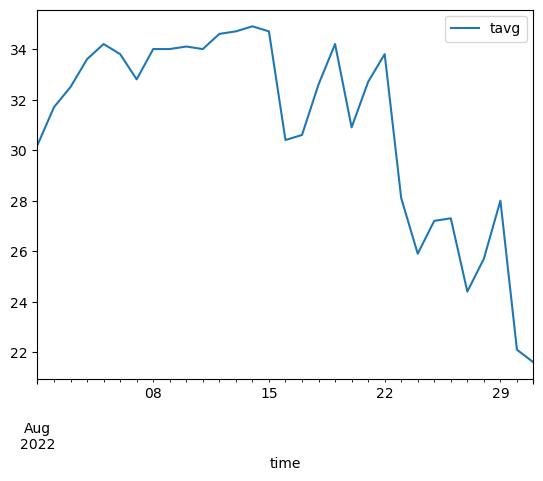

In [43]:
data.plot(y=['tavg'])
plt.show()

In [44]:
T_base = 18
cdds = [max(temp - T_base, 0) for temp in data.tavg]

In [45]:
total_cdd = sum(cdds)

In [46]:
print("Total CDD:", total_cdd)

Total CDD: 401.3
